### We certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.

# Part II
## Logistic Regression



In [142]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [143]:
df2=pd.read_csv('penguins_lter.csv')

In [144]:
# Read, preprocess and print main statistic about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [145]:
df2['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [146]:
df2.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [147]:
df2.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [148]:
df2.shape

(344, 17)

In [149]:
df2.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [150]:
df2.isnull().sum(axis=0)

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [151]:
df2.drop(['Comments'],axis=1,inplace=True)

<AxesSubplot:>

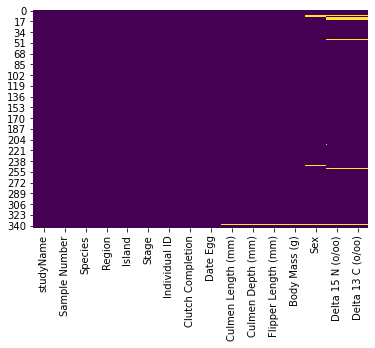

In [152]:
sb.heatmap(df2.isnull(),cbar=False,cmap='viridis')

In [153]:
df2.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [154]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [155]:
df2.dropna(inplace=True)

In [156]:
df2.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799


In [157]:
df2.drop(df2.index[df2['Sex'] == '.'], inplace=True)
df2['Sex'].value_counts()

FEMALE    163
MALE      161
Name: Sex, dtype: int64

In [158]:
# Converting year to categorical type as it cannot be continuous
df2['studyName']=df2['studyName'].astype('category')
df2['Species']=df2['Species'].astype('category')
df2['Region']=df2['Region'].astype('category')
df2['Island']=df2['Island'].astype('category')
df2['Stage']=df2['Stage'].astype('category')
df2['Clutch Completion']=df2['Clutch Completion'].astype('category')
df2['Sex']=df2['Sex'].astype('category')

In [159]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   studyName            324 non-null    category
 1   Sample Number        324 non-null    int64   
 2   Species              324 non-null    category
 3   Region               324 non-null    category
 4   Island               324 non-null    category
 5   Stage                324 non-null    category
 6   Individual ID        324 non-null    object  
 7   Clutch Completion    324 non-null    category
 8   Date Egg             324 non-null    object  
 9   Culmen Length (mm)   324 non-null    float64 
 10  Culmen Depth (mm)    324 non-null    float64 
 11  Flipper Length (mm)  324 non-null    float64 
 12  Body Mass (g)        324 non-null    float64 
 13  Sex                  324 non-null    category
 14  Delta 15 N (o/oo)    324 non-null    float64 
 15  Delta 13 C (o/oo)    32

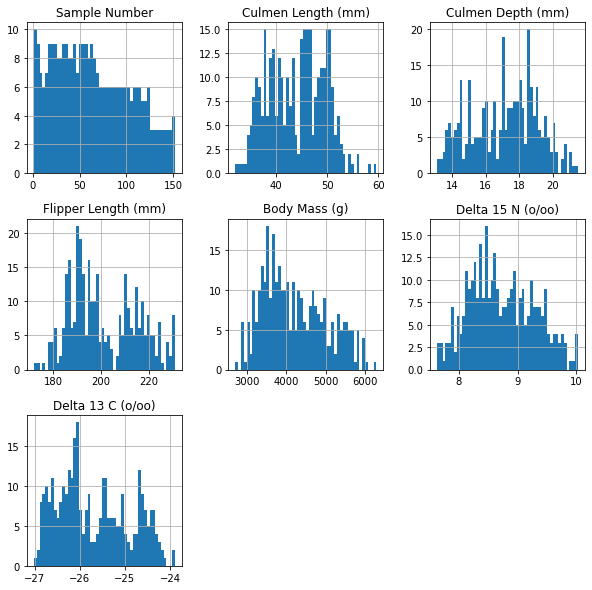

In [160]:
df2.hist(bins=50, figsize=(10, 10));

/Users/arnavsmac/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


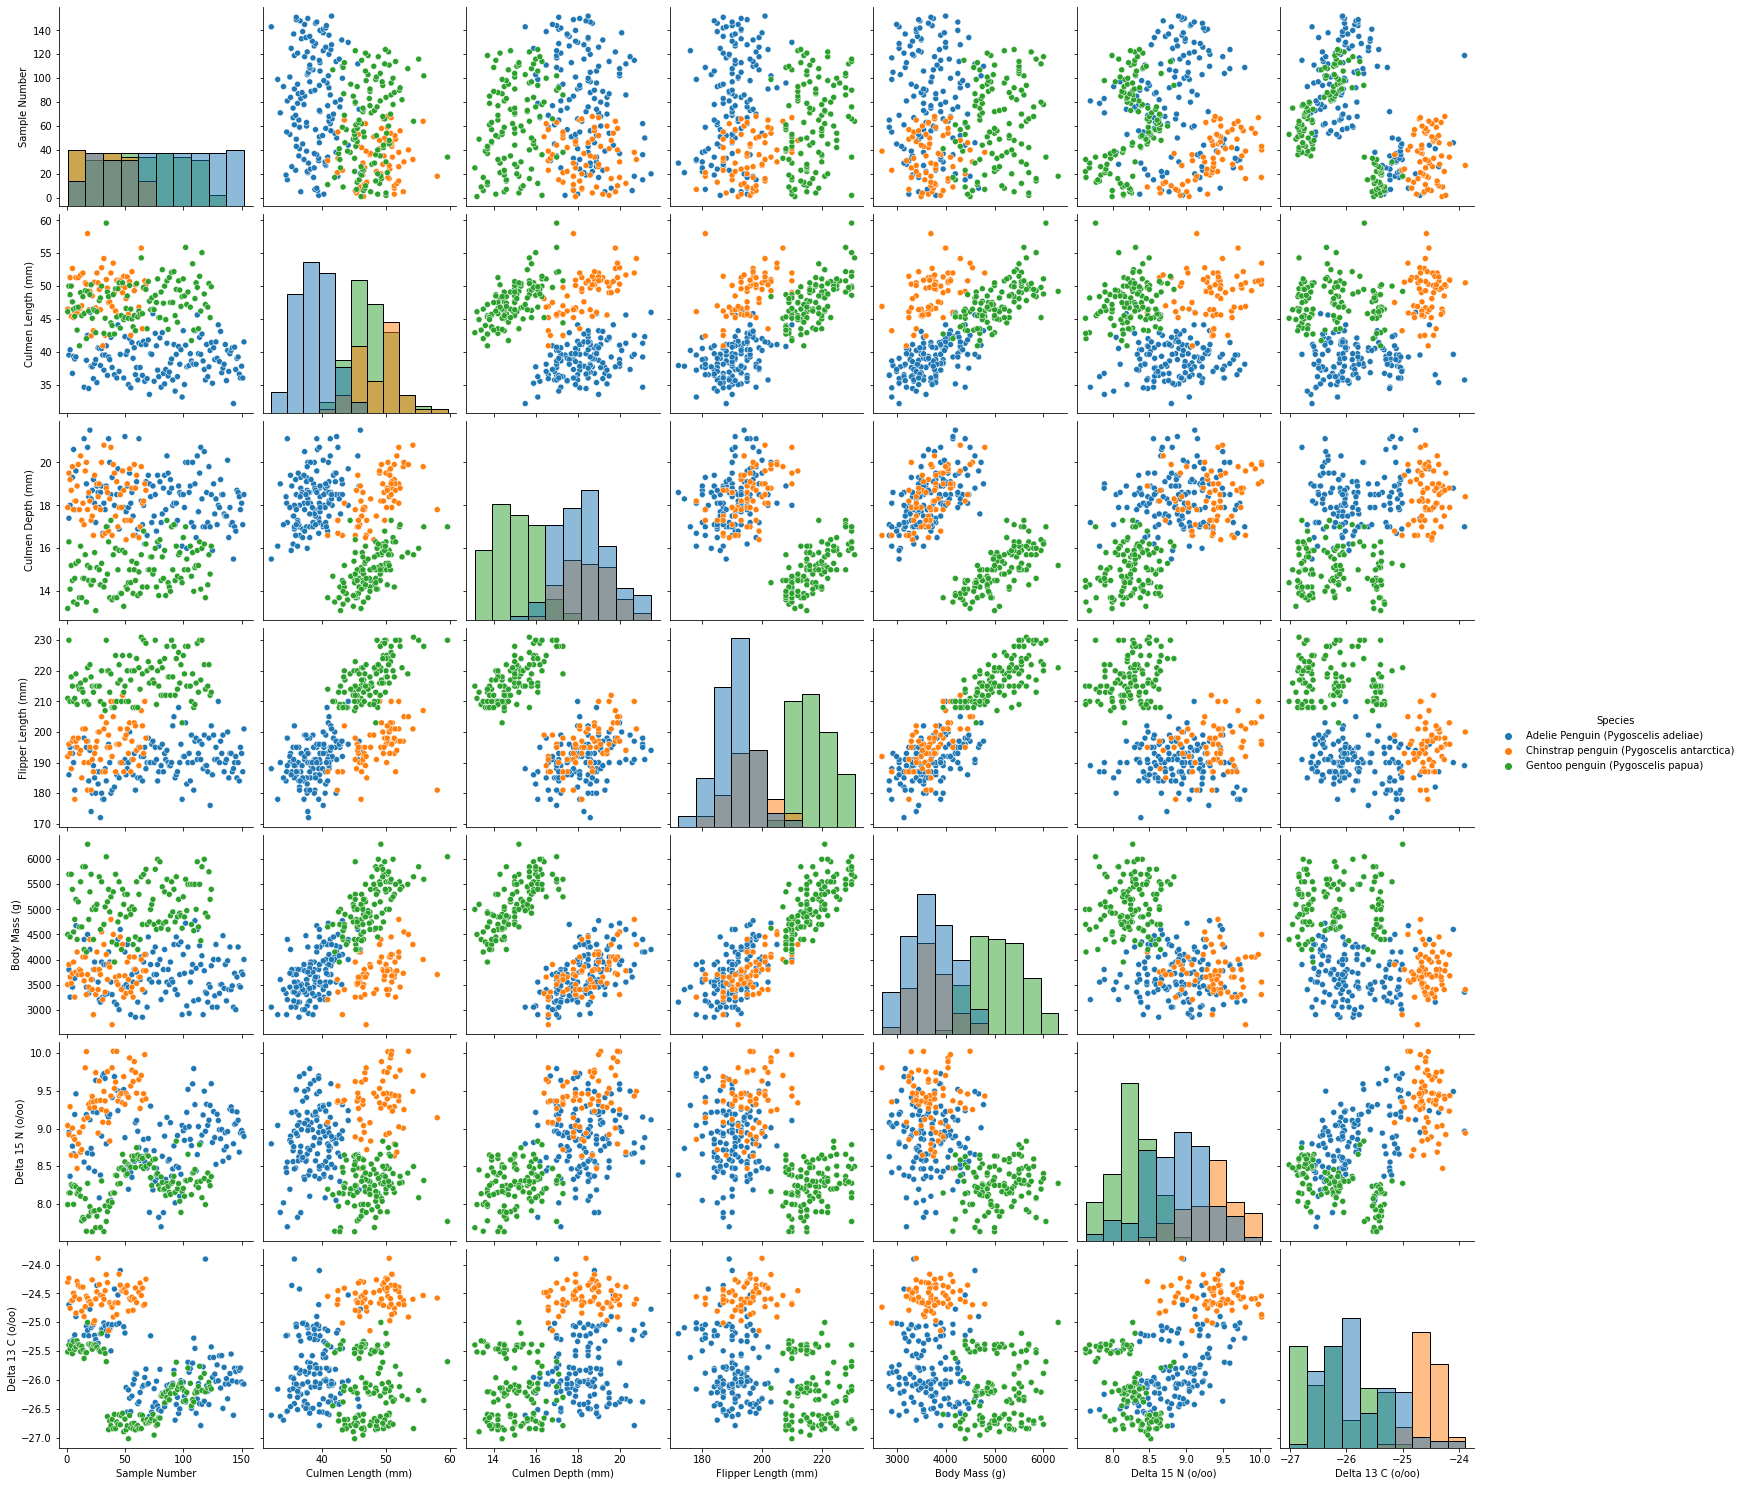

In [161]:
sb.pairplot(df2, hue="Species", size=3,diag_kind="hist")


The scatter plot above shows us the correlation with respect to other features. The important features which account the most for the classification in our model are Culmen Length(mm) and Delta 13 C (o/oo), 

In [162]:
df2.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [163]:
df2.drop(['studyName','Sample Number','Individual ID','Date Egg'],axis=1,inplace=True)

In [164]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Species              324 non-null    category
 1   Region               324 non-null    category
 2   Island               324 non-null    category
 3   Stage                324 non-null    category
 4   Clutch Completion    324 non-null    category
 5   Culmen Length (mm)   324 non-null    float64 
 6   Culmen Depth (mm)    324 non-null    float64 
 7   Flipper Length (mm)  324 non-null    float64 
 8   Body Mass (g)        324 non-null    float64 
 9   Sex                  324 non-null    category
 10  Delta 15 N (o/oo)    324 non-null    float64 
 11  Delta 13 C (o/oo)    324 non-null    float64 
dtypes: category(6), float64(6)
memory usage: 20.3 KB


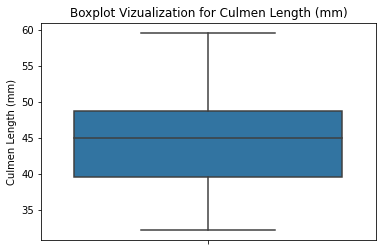

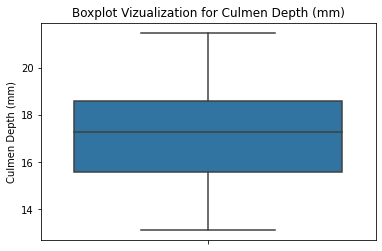

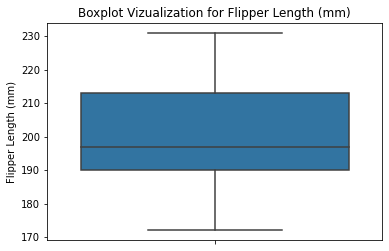

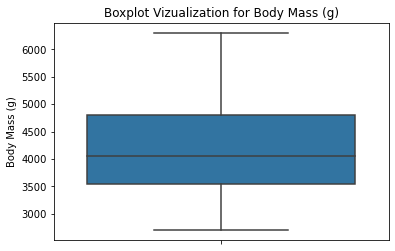

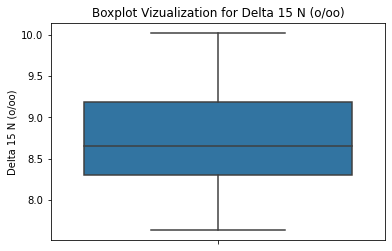

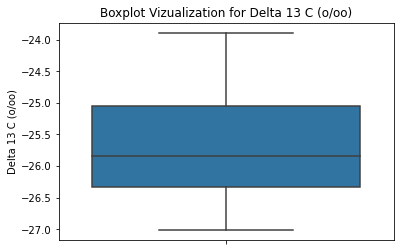

In [165]:
# Check the outliers
numerical_var = ['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
for i in numerical_var:
    sb.boxplot(y=i,data=df2)
    plt.title('Boxplot Vizualization for '+i)
    plt.show()

From the boxplots above, we can see that there isn't outlier in the dataset.

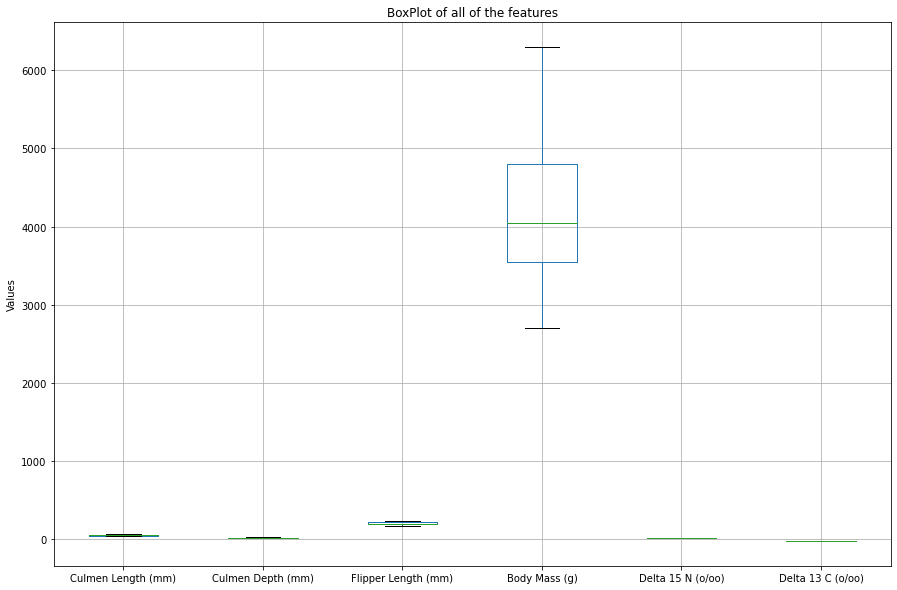

In [166]:
plt.figure(figsize=[15,10])
boxplot = df2.boxplot(column=['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])
plt.title("BoxPlot of all of the features")
plt.ylabel('Values');

From the above plot, we can see that the features are in the different scales, so we need to scale them. 

In [167]:
d1=df2[['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

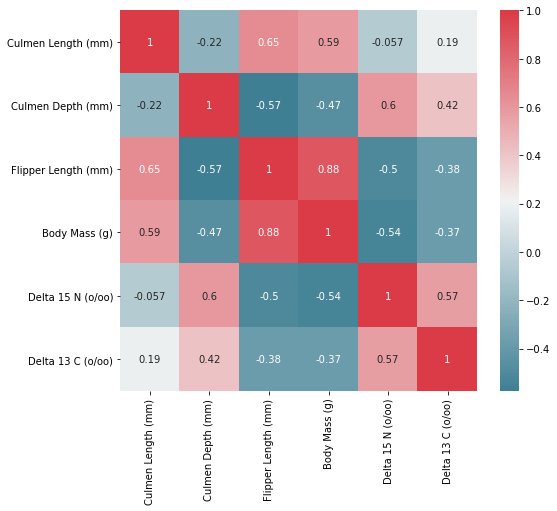

In [168]:
f, ax = plt.subplots(figsize=(8, 7))
corr = d1.corr()
sb.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220, 10, as_cmap=True),annot=True,ax=ax,);

In [169]:
df_2=df2.copy()

Removing flipper length as it has high correlation with bill length, bill depth and body mass.

In [170]:
df2.drop(['Flipper Length (mm)'],axis=1,inplace=True)

In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Species             324 non-null    category
 1   Region              324 non-null    category
 2   Island              324 non-null    category
 3   Stage               324 non-null    category
 4   Clutch Completion   324 non-null    category
 5   Culmen Length (mm)  324 non-null    float64 
 6   Culmen Depth (mm)   324 non-null    float64 
 7   Body Mass (g)       324 non-null    float64 
 8   Sex                 324 non-null    category
 9   Delta 15 N (o/oo)   324 non-null    float64 
 10  Delta 13 C (o/oo)   324 non-null    float64 
dtypes: category(6), float64(5)
memory usage: 17.8 KB


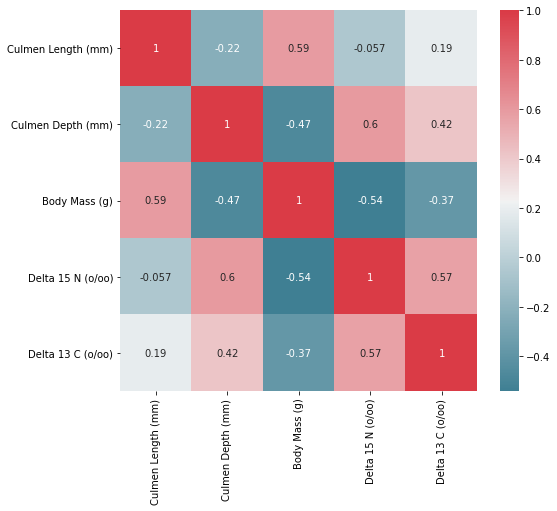

In [172]:
# Again plotting the heatmap to check for multicollinearity
f, ax = plt.subplots(figsize=(8, 7))
d1=df2[['Culmen Length (mm)','Culmen Depth (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]
corr = d1.corr()
sb.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220, 10, as_cmap=True),annot=True,ax=ax,);

In [173]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Species             324 non-null    category
 1   Region              324 non-null    category
 2   Island              324 non-null    category
 3   Stage               324 non-null    category
 4   Clutch Completion   324 non-null    category
 5   Culmen Length (mm)  324 non-null    float64 
 6   Culmen Depth (mm)   324 non-null    float64 
 7   Body Mass (g)       324 non-null    float64 
 8   Sex                 324 non-null    category
 9   Delta 15 N (o/oo)   324 non-null    float64 
 10  Delta 13 C (o/oo)   324 non-null    float64 
dtypes: category(6), float64(5)
memory usage: 17.8 KB


In [174]:
# Adding dummies for categorical columns
# One hot encoding for Sex column as it is categorical column
df2=pd.get_dummies(df2,columns=['Sex','Island','Species','Region','Stage','Clutch Completion'],drop_first=True)

In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Culmen Length (mm)                                 324 non-null    float64
 1   Culmen Depth (mm)                                  324 non-null    float64
 2   Body Mass (g)                                      324 non-null    float64
 3   Delta 15 N (o/oo)                                  324 non-null    float64
 4   Delta 13 C (o/oo)                                  324 non-null    float64
 5   Sex_MALE                                           324 non-null    uint8  
 6   Island_Dream                                       324 non-null    uint8  
 7   Island_Torgersen                                   324 non-null    uint8  
 8   Species_Chinstrap penguin (Pygoscelis antarctica)  324 non-null    uint8  
 9   Species_Ge

In [176]:
df2.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sex_MALE', 'Island_Dream',
       'Island_Torgersen', 'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Clutch Completion_Yes'],
      dtype='object')

In [177]:
cnames=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
# cnames=['bill_depth_mm','body_mass_g']

In [178]:
# Normalized the continous
for i in cnames:
    df2[i] = (df2[i] - df2[i].min())/(df2[i].max()-df2[i].min())

In [179]:
df2.describe()

,Culmen Length (mm),Culmen Depth (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex_MALE,Island_Dream,Island_Torgersen,Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Clutch Completion_Yes
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.00000,324.000000,324.000000
mean,0.434669,0.479461,0.420546,0.462864,0.425093,0.496914,0.367284,0.132716,0.20679,0.364198,0.895062
std,0.199296,0.234213,0.224799,0.230680,0.252796,0.500764,0.482810,0.339792,0.40563,0.481949,0.306948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.269091,0.294643,0.236111,0.280891,0.221125,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,0.467273,0.500000,0.375000,0.428868,0.375839,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,0.603636,0.654762,0.583333,0.647356,0.627473,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [180]:
df2.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sex_MALE', 'Island_Dream',
       'Island_Torgersen', 'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Clutch Completion_Yes'],
      dtype='object')

In [181]:
train = df2.sample(frac=0.8, random_state=25)
test = df2.drop(train.index)

In [182]:
train.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sex_MALE', 'Island_Dream',
       'Island_Torgersen', 'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Clutch Completion_Yes'],
      dtype='object')

In [183]:
# Selecting target as Sex of the penguins
X_train=train[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island_Dream',
       'Island_Torgersen', 'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Clutch Completion_Yes']].to_numpy()


In [184]:
Y_train=train[['Sex_MALE']].to_numpy()

In [185]:
X_train.shape

(259, 10)

In [186]:
Y_train.shape

(259, 1)

In [187]:
X_test=test[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island_Dream',
       'Island_Torgersen', 'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Clutch Completion_Yes']].to_numpy()
Y_test=test[['Sex_MALE']].to_numpy()

In [188]:
X_train.shape

(259, 10)

In [189]:
X_test.shape[0]

65

In [190]:
Y_test.shape[0]

65

In [191]:
len(X_test)

65

In [192]:
class LogitRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    

    # This method performs the training. # Initialize weights # For a number of iterations
    # Call gradient_descent function
    # Call cost function and keep it in an array , e.g. loss.append() 
    def fit(self, x, y):
        self.x = x
        self.y = y
        m,n=self.x.shape
        self.w = np.random.uniform(0,1,n).reshape(n,1)

      # self.w = np.random.uniform(0,1,8).reshape(8,1)
        self.b = 0.0
    
        loss = []
        for ele in range(self.iterations):
            self.gradient_descent(x,y)
            self.w = self.w - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.dB
            cost = self.cost(self.x, self.y)
        #print(cost)
            loss.append(cost)
        
        return loss,self.w,self.b
        # print('iteration: ' + str(ele + 1) + ', loss: '+ str(cost))

    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    
    def gradient_descent(self,x,y):
      # current prediction y_hat
        self.m = len(y)
        self.z = np.dot(x, self.w)+self.b
        pred = self.sigmoid(self.z)
        delta = pred - y
        self.dW = (np.dot(x.T, delta))/self.m
        self.dB = np.sum(delta)/self.m

    def cost(self, x, y):
      # Loss function for Logistic Regression
        h = self.sigmoid(np.dot(self.x,self.w)+self.b)
        j = np.mean(-y * np.log(h) - (1 - y)*np.log(1 - h))
        return j


    def predict(self, X):
        l=[]
        z = self.sigmoid(np.dot(X,self.w)+self.b)
        for i in z:
            if i >= 0.5:
                l.append(1)
            else:
                l.append(0)
        return l


      

    def accuracy(self, y_pred, Y_test):
        print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred - Y_test)) * 100))

In [193]:
learning_rate = 0.001
iterations = 10000
np.random.seed(1)
model = LogitRegression(learning_rate, iterations)

In [194]:
a,w,b=model.fit(X_train, Y_train)

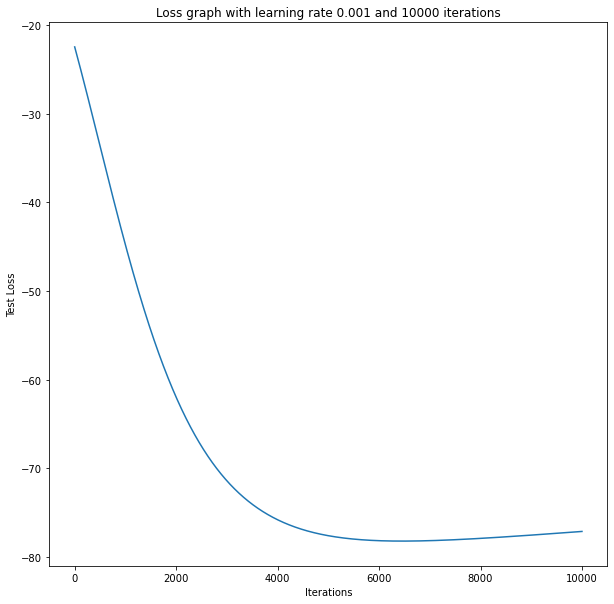

In [195]:
plt.figure(figsize=[10,10])
plt.title('Loss graph with learning rate 0.001 and 10000 iterations')
plt.xlabel('Iterations')
plt.ylabel('Test Loss')
plt.plot(a)
plt.show();

In [196]:
Y_pred = model.predict(X_test)

In [197]:
Y_pred = np.array(Y_pred)

In [198]:
Y_pred = Y_pred.reshape(65,1)

In [199]:
Y_pred.shape

(65, 1)

In [200]:
np.mean(np.equal(Y_pred,Y_test))

0.8

In [201]:
w

array([[ 0.44081835],
       [ 0.81016509],
       [ 0.19315998],
       [ 0.08394918],
       [-0.15556759],
       [-0.15546088],
       [ 0.10528387],
       [ 0.17596739],
       [ 0.1794264 ],
       [-0.0403866 ]])

In [202]:
learning_rate = 0.001
iterations = 100000
np.random.seed(2)
model = LogitRegression(learning_rate, iterations)

In [203]:
a,w,b=model.fit(X_train, Y_train)

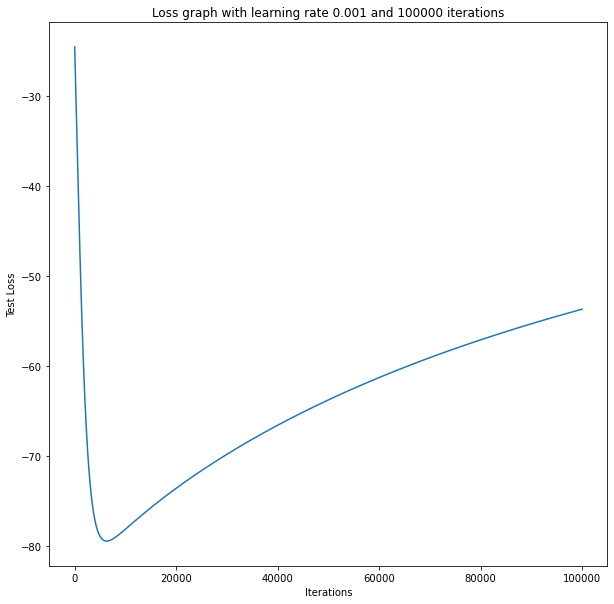

In [204]:
plt.figure(figsize=[10,10])
plt.title('Loss graph with learning rate 0.001 and 100000 iterations')
plt.xlabel('Iterations')
plt.ylabel('Test Loss')
plt.plot(a)
plt.show();

In [205]:
Y_pred = model.predict(X_test)

In [206]:
Y_pred = np.array(Y_pred)

In [207]:
Y_pred = Y_pred.reshape(65,1)

In [208]:
Y_pred.shape

(65, 1)

In [209]:
np.mean(np.equal(Y_pred,Y_test))

0.8153846153846154

In [210]:
w

array([[ 1.78615066],
       [ 2.4157951 ],
       [ 3.17729218],
       [ 0.27059362],
       [-0.61497327],
       [-0.2025674 ],
       [-0.02698506],
       [-0.25958252],
       [-0.74165499],
       [-0.61761834]])

In [211]:
learning_rate = 1e-4
iterations = 100000
np.random.seed(3)
model = LogitRegression(learning_rate, iterations)

In [212]:
a,w,b=model.fit(X_train, Y_train)

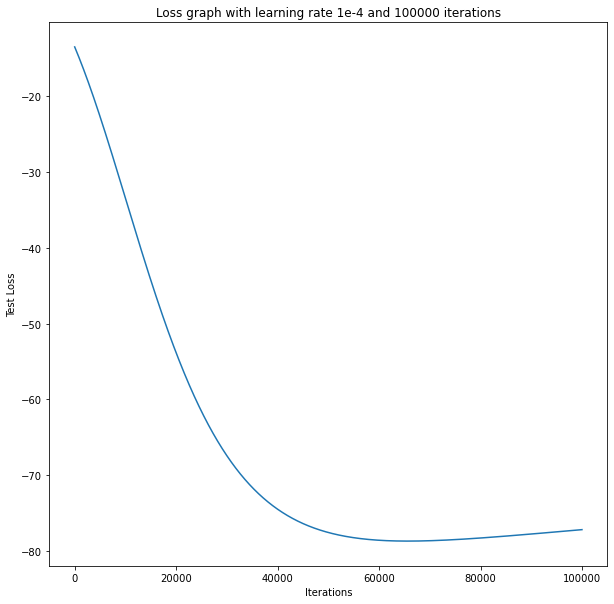

In [213]:
plt.figure(figsize=[10,10])
plt.title('Loss graph with learning rate 1e-4 and 100000 iterations')
plt.xlabel('Iterations')
plt.ylabel('Test Loss')
plt.plot(a)
plt.show();

In [214]:
Y_pred = model.predict(X_test)

In [215]:
Y_pred = np.array(Y_pred)

In [216]:
Y_pred = Y_pred.reshape(65,1)

In [217]:
Y_pred.shape

(65, 1)

In [218]:
# Accuracy
np.mean(np.equal(Y_pred,Y_test))

0.6153846153846154

In [219]:
# Final weight vector
w

array([[ 0.51427595],
       [ 0.61687064],
       [ 0.49932132],
       [ 0.09561065],
       [ 0.37186288],
       [ 0.24345673],
       [ 0.0702057 ],
       [-0.1803591 ],
       [ 0.0200179 ],
       [-0.21786161]])

In [220]:
# Final bias
b

-0.8326549126605851

#### References used:


 https://numpy.org/doc/stable/

 https://pandasguide.readthedocs.io/en/latest/

 https://www.datacamp.com/community/blog/python-pandas-cheat-sheet

 https://machinelearningknowledge.ai/matplotlib-heatmap-complete-tutorial-for-beginners/

 https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html